# 演習3-2

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
44.86447226598482
0.48743675084831684


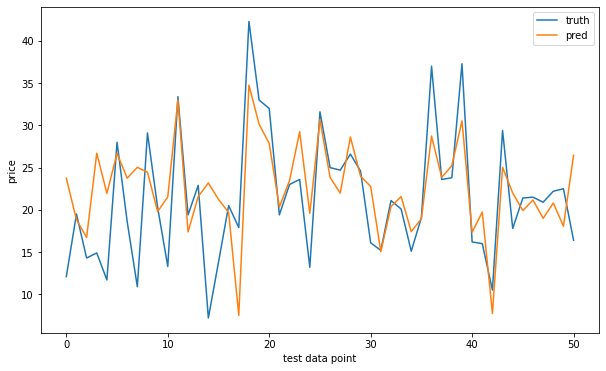

-34.790048060604356 9.139694845855256


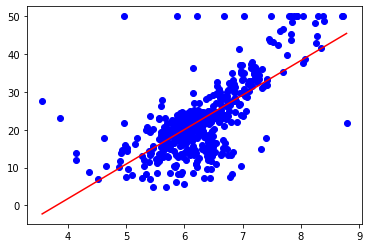

In [20]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## ボストンの住宅価格を予測する

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection as modsel
from sklearn import linear_model

### データ読み込み
boston = datasets.load_boston()
print(boston.feature_names)

x = boston.data[:, 5]
y = boston.target

### 線形回帰モデル読み込み
linreg = linear_model.LinearRegression()
#linreg = linear_model.Lasso()
#linreg = linear_model.Ridge()

### データを学習用とテスト用に分割
x_train, x_test, y_train, y_test = modsel.train_test_split(
    x , y, test_size=0.1)

### fit の入力は、多変数に対応している。
### 今回の入力変数は 1 個なので、reshape(-1, 1)する。
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

### 学習
linreg.fit(x_train, y_train)

### 学習結果
print(metrics.mean_squared_error(y_train, linreg.predict(x_train))) # MSE
print(linreg.score(x_train, y_train))                 # 決定係数 R二乗スコア 



### 予測と実際の価格をグラフ化
### テストデータで評価
y_pred = linreg.predict(x_test)

plt.figure(figsize=(10, 6))

plt.plot(y_test, label='truth')
plt.plot(y_pred, label='pred')
plt.xlabel('test data point')
plt.ylabel('price')
plt.legend()
plt.show()

### 予測の直線を描画する。

w0 = linreg.intercept_
w1 = linreg.coef_[0]

print(w0, w1)
f = lambda x: w0 + w1 * x

plt.scatter(x, y, color='b')
line_x = np.linspace(x.min(), x.max())
plt.plot(line_x, f(line_x), color='r')
plt.show()